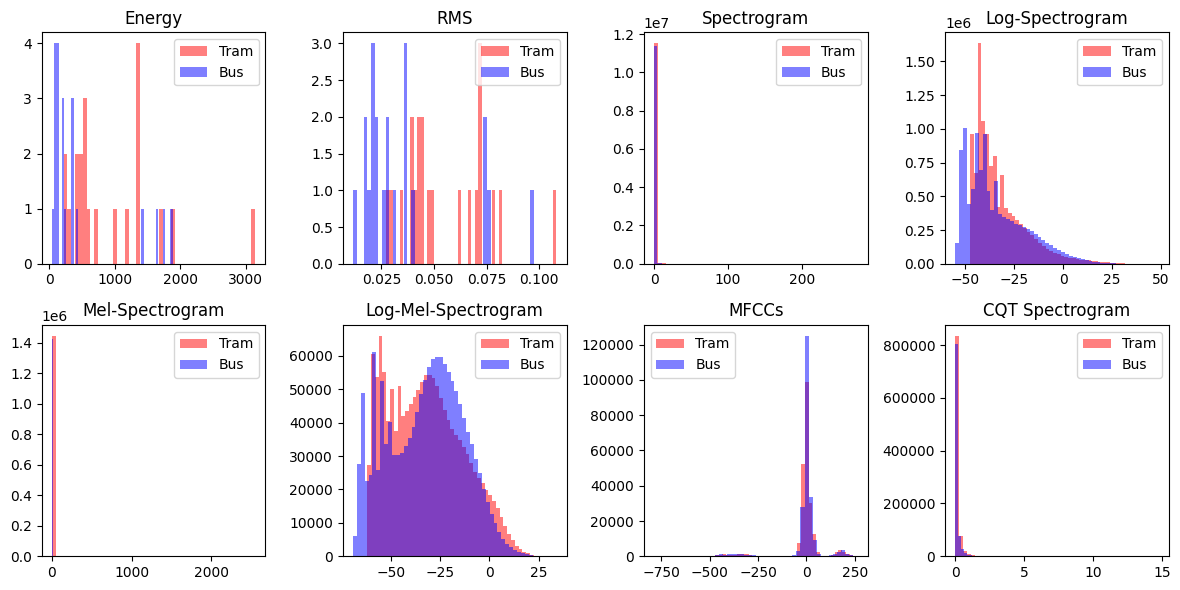

Validation metrics of SVM:
Validation Accuracy: 0.83
Validation Precision: 0.75
Validation Recall: 1.00

Test Accuracy: 0.57
Validation metrics of KNN:
Validation Accuracy: 0.67
Validation Precision: 0.67
Validation Recall: 0.67

Test Accuracy: 1.00


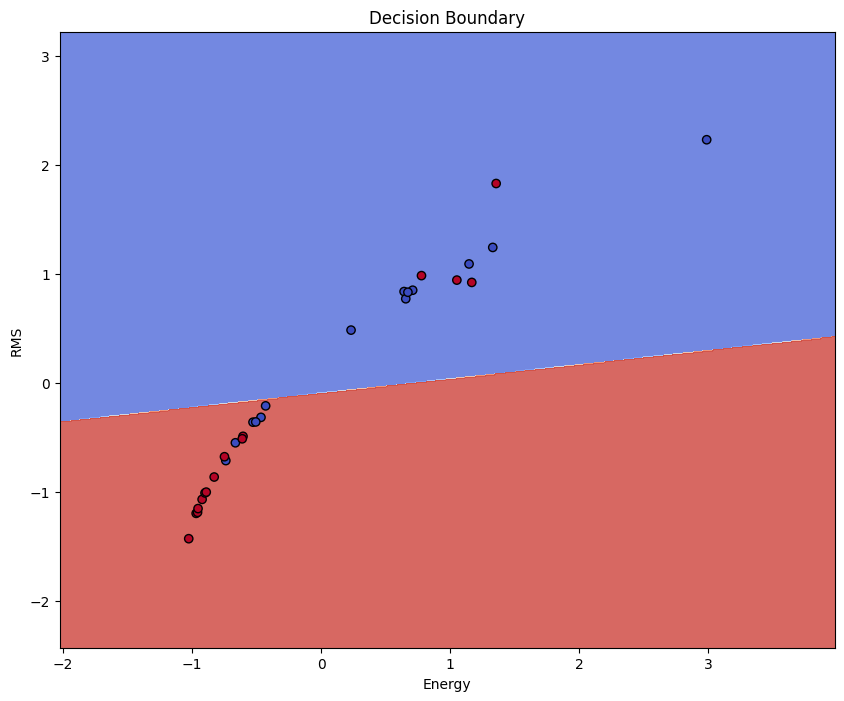

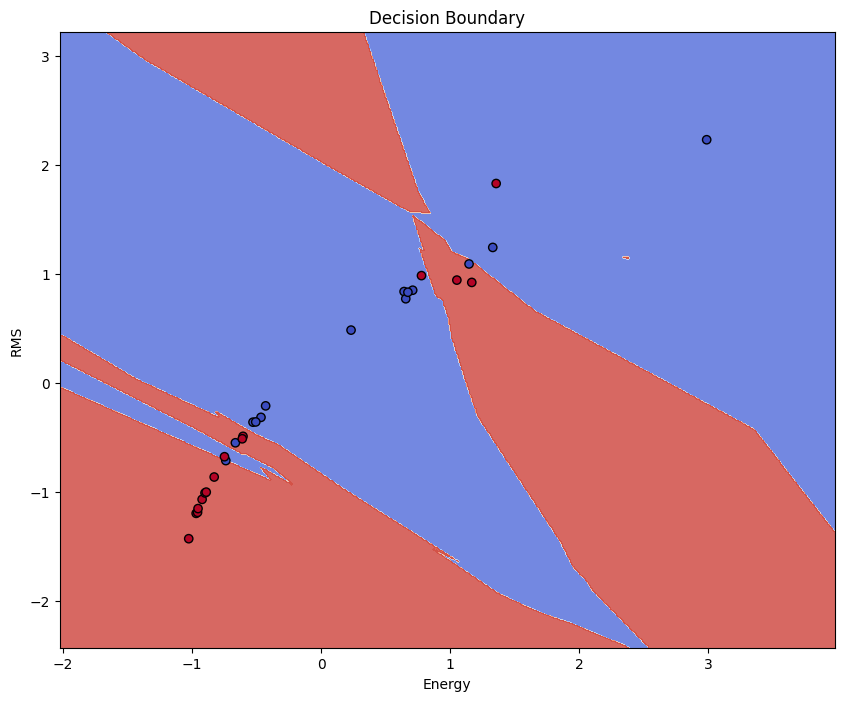

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 10 13:07:53 2023

@author: Triet Nguyen
"""

import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    features = []
    
    # Energy
    energy = np.sum(np.square(y))
    features.append(energy)
    
    # RMS (Root Mean Square)
    rms = np.sqrt(np.mean(np.square(y)))
    features.append(rms)
    
    # Spectrogram
    spec = np.abs(librosa.stft(y))
    features.append(spec)
    
    # Log-spectrogram
    log_spec = librosa.amplitude_to_db(spec)
    features.append(log_spec)
    
    # Mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features.append(mel_spec)
    
    # Log Mel-spectrogram
    log_mel_spec = librosa.power_to_db(mel_spec)
    features.append(log_mel_spec)
    
    # MFCCs (Mel-frequency cepstral coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    features.append(mfccs)
    
    # CQT spectrogram
    cqt_spec = np.abs(librosa.cqt(y=y, sr=sr))
    features.append(cqt_spec)
    
    return features

# Load and extract features from audio files
tram_files = ['tram{}.wav'.format(i) for i in range(1, 22)]
bus_files = ['bus{}.wav'.format(i) for i in range(1, 22)]

tram_features = [extract_features(file) for file in tram_files]
bus_features = [extract_features(file) for file in bus_files]

# Display histograms for selected features
# Display histograms for selected features
def plot_histograms(features_list, title):
    num_features = len(features_list[0][0])  # Get the number of features
    
    plt.figure(figsize=(12, 6))
    
    for i in range(num_features):
        plt.subplot(2, 4, (i % 8) + 1)
        
        tram_feature_values = np.concatenate([file_features[i].flatten() for file_features in features_list[0]])
        bus_feature_values = np.concatenate([file_features[i].flatten() for file_features in features_list[1]])
        
        plt.hist(tram_feature_values, bins=50, alpha=0.5, label='Tram', color='red')
        plt.hist(bus_feature_values, bins=50, alpha=0.5, label='Bus', color='blue')
        plt.title(title[i])
        plt.legend()

    plt.tight_layout()
    plt.show()


feature_titles = ['Energy', 'RMS', 'Spectrogram', 'Log-Spectrogram', 'Mel-Spectrogram',
                  'Log-Mel-Spectrogram', 'MFCCs', 'CQT Spectrogram']
plot_histograms([tram_features, bus_features], feature_titles)


# Selecting features for training (in this case energy and rms)

X_tram = np.array([np.hstack([ features[i] for i in [0,1] ]) for features in tram_features])
X_bus = np.array([np.hstack([ features[i] for i in [0,1] ]) for features in bus_features])

# Creating labels
y_tram = np.zeros(len(X_tram))  # Label for tram class
y_bus = np.ones(len(X_bus))     # Label for bus class

# Concatenating data and labels
X = np.concatenate([X_tram, X_bus])
y = np.concatenate([y_tram, y_bus])

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = svm_model.predict(X_val_scaled)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print("Validation metrics of SVM:")
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
y_test_pred = svm_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Build KNN model


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = knn_model.predict(X_val_scaled)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print("Validation metrics of KNN:")
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
y_test_pred = knn_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")


# Decision boundary

h = 0.01  # Step size in the mesh

# Create a mesh of points to plot in
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Energy')
plt.ylabel('RMS')
plt.title('Decision Boundary')
plt.show()

# Decision boundary for KNN

h = 0.01  # Step size in the mesh

# Create a mesh of points to plot in
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='black')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Energy')
plt.ylabel('RMS')
plt.title('Decision Boundary')
plt.show()